# 第6章 事後分布の推定方法



## 6.1 共役事前分布を利用したパラメータ推定



### 6.1.2 ガンマ・ポアソン共役



#### ポアソン分布



リスト6.1: 二項分布とポアソン分布の比較



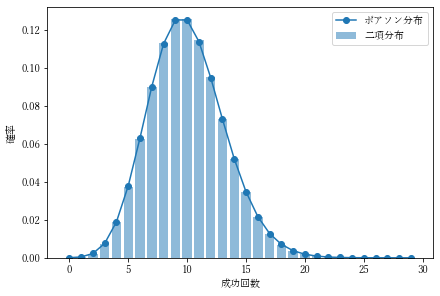

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams['font.family'] = 'Yu Mincho'

n = 1000
p = 0.01
# lambda はPythonの予約語で使えないので変数名は lambda_ としている
lambda_ = n * p
x = np.arange(30)

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(x, stats.binom.pmf(x, n, p), alpha=0.5,
       label='二項分布')
ax.plot(x, stats.poisson.pmf(x, lambda_), '-o',
        label='ポアソン分布')

ax.set_xlabel('成功回数')
ax.set_ylabel('確率')
ax.legend()

リスト6.2: ポアソン分布の確率の計算

In [2]:
lambda_ = 1.6
x = 4

stats.poisson.pmf(x, lambda_)

0.05513120918040725

リスト6.3: ポアソン分布におけるパラメータ $\lambda$ の影響

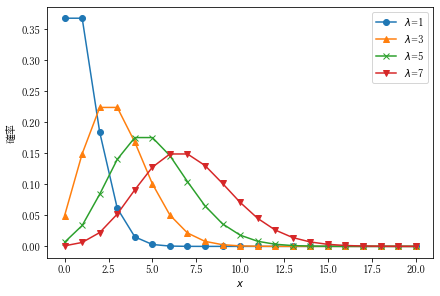

In [3]:
lambda_ = [1, 3, 5, 7]
ls = ['-o', '-^', '-x', '-v']

n = 20
x = np.arange(n + 1)

fig, ax = plt.subplots(constrained_layout=True)

for m, l in zip(lambda_, ls):
    ax.plot(x, stats.poisson.pmf(x, m), l,
            label=rf'$\lambda$={m}')

ax.set_xlabel(r'$x$')
ax.set_ylabel('確率')
ax.legend()

リスト6.4: ポアソン分布の分散の計算



In [4]:
lambda_ = 1.6

stats.poisson.var(lambda_)

1.6

#### ガンマ分布



リスト6.5: ガンマ分布の確率密度の計算



In [5]:
alpha = 2
beta = 1
x = 3

stats.gamma.pdf(x, alpha, scale=1/beta)

0.14936120510359185

リスト6.6: ガンマ分布におけるパラメータ $\alpha$ と $\beta$ の影響



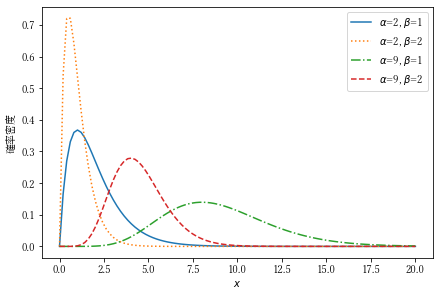

In [6]:
alphas = [2, 2, 9, 9]
betas = [1, 2, 1, 2]
ls = ['-', ':', '-.', '--']
x = np.linspace(0, 20, num=100)

fig, ax = plt.subplots(constrained_layout=True)

for a, b, l in zip(alphas, betas, ls):
    ax.plot(x, stats.gamma.pdf(x, a, scale=1/b), l,
            label=rf'$\alpha$={a}, $\beta$={b}')

ax.set_xlabel(r'$x$')
ax.set_ylabel('確率密度')
ax.legend()

#### パラメータ推定



リスト6.7: $\lambda=4$ における尤度関数のグラフ



Text(0, 0.5, '尤度')

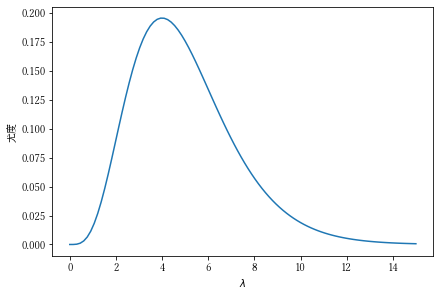

In [7]:
lambda_ = np.linspace(0, 15, num=100)
x = 4

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(lambda_, stats.poisson.pmf(x, lambda_))

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('尤度')

リスト6.8: 事前分布と事後分布の比較



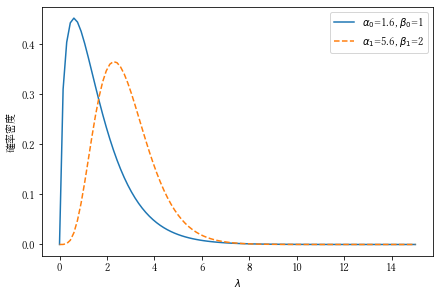

In [8]:
alpha0 = 1.6
beta0 = 1
alpha1 = alpha0 + 4
beta1 = beta0 + 1

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(lambda_, 
        stats.gamma.pdf(lambda_, alpha0, scale=1/beta0),
        label=rf'$\alpha_0$={alpha0}, $\beta_0$={beta0}')
ax.plot(lambda_, 
        stats.gamma.pdf(lambda_, alpha1, scale=1/beta1), 
        '--',
        label=rf'$\alpha_1$={alpha1}, $\beta_1$={beta1}')

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('確率密度')
ax.legend()

リスト6.9: 更新された事後分布の確認

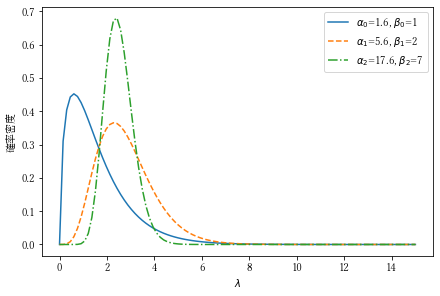

In [9]:
alpha2 = alpha1 + 12
beta2 = beta1 + 5

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(lambda_, 
        stats.gamma.pdf(lambda_, alpha0, scale=1/beta0),
        label=rf'$\alpha_0$={alpha0}, $\beta_0$={beta0}')
ax.plot(lambda_,
        stats.gamma.pdf(lambda_, alpha1, scale=1/beta1),
        '--',
        label=rf'$\alpha_1$={alpha1}, $\beta_1$={beta1}')
ax.plot(lambda_,
        stats.gamma.pdf(lambda_, alpha2, scale=1/beta2),
        '-.',
        label=rf'$\alpha_2$={alpha2}, $\beta_2$={beta2}')

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('確率密度')
ax.legend()

リスト6.10: 無情報事前分布を使用した場合の事後分布



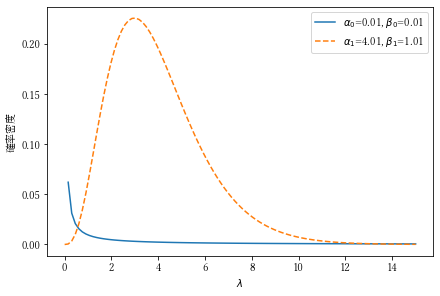

In [10]:
alpha0 = 0.01
beta0 = 0.01
alpha1 = alpha0 + 4
beta1 = beta0 + 1

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(lambda_,
        stats.gamma.pdf(lambda_, alpha0, scale=1/beta0),
        label=rf'$\alpha_0$={alpha0}, $\beta_0$={beta0}')
ax.plot(lambda_,
        stats.gamma.pdf(lambda_, alpha1, scale=1/beta1),
        '--',
        label=rf'$\alpha_1$={alpha1}, $\beta_1$={beta1}')

ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('確率密度')
ax.legend()

## 6.2 PyMC3入門



### 6.2.2 PyMC3の基本的な使い方



リスト6.11: PyMC3のインポート



In [12]:
import pymc3 as pm

リスト6.12: 警告を非表示にする



In [13]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

リスト6.13: 確率分布クラスの一覧



In [14]:
# 長いので10個だけ表示
dir(pm.distributions)[:10]

['AR',
 'AR1',
 'AsymmetricLaplace',
 'BART',
 'Bernoulli',
 'Beta',
 'BetaBinomial',
 'Binomial',
 'Bound',
 'Categorical']

リスト6.14: 正規分布を表すオブジェクト



In [15]:
mu = 4
sigma = 1

dist = pm.Normal.dist(mu=mu, sigma=sigma)
dist

リスト6.15: 正規分布の乱数の生成



In [16]:
import numpy as np

# 乱数のシードを設定
np.random.seed(1)

dist.random(size=5)

array([5.62434536, 3.38824359, 3.47182825, 2.92703138, 4.86540763])

リスト6.16: 統計モデルの定義方法



In [17]:
with pm.Model() as model:
    pm.Normal('X', mu=mu, sigma=sigma)

リスト6.17: 定義したモデルの数式表現



In [18]:
model

リスト6.18: モデルに定義されている確率変数



In [19]:
model.basic_RVs

[X ~ Normal]

リスト6.19: モデルに従う乱数の生成



In [20]:
with model:
    trace = pm.sample(random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [X]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 125 seconds.


リスト6.20: 生成された乱数の確認



In [21]:
trace['X']

array([5.3071602 , 5.23964484, 5.53259143, ..., 2.84873344, 3.21571482,
       1.24450018])

リスト6.21: 乱数の生成回数の確認



In [22]:
trace['X'].shape

(4000,)

リスト6.22: サンプリング結果をデータフレームで扱う方法



In [23]:
pm.trace_to_dataframe(trace)

,X
0,5.307160
1,5.239645
2,5.532591
3,5.468521
4,4.743249
...,...
3995,5.211034
3996,5.211034
3997,2.848733
3998,3.215715


リスト6.23: ヒストグラムとカーネル密度推定



<AxesSubplot:ylabel='Density'>

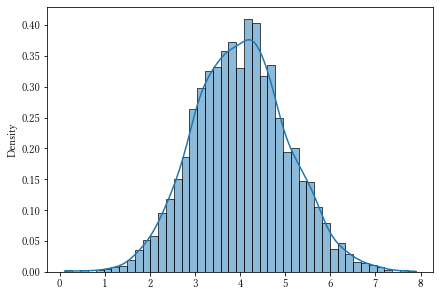

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(constrained_layout=True)

sns.histplot(trace['X'], stat='density', kde=True, ax=ax)

リスト6.24: 確率変数間に依存関係がある場合の例



In [25]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    pm.Normal('theta', mu=mu, sigma=1)

    trace = pm.sample(random_seed=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 125 seconds.


リスト6.25: モデルの数式表現



In [26]:
model

リスト6.26: モデルに定義されている確率変数



In [27]:
model.basic_RVs

[mu ~ Normal, theta ~ Normal]

リスト6.27: サンプリング結果の確認



<AxesSubplot:ylabel='Density'>

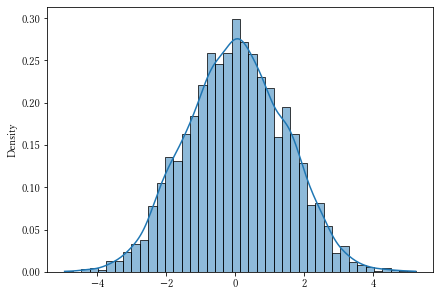

In [28]:
fig, ax = plt.subplots(constrained_layout=True)

sns.histplot(trace['theta'], stat='density',
             kde=True, ax=ax)

### 6.2.3 事後分布のサンプリング



リスト6.28: 観測データがある場合のモデルの定義方法



In [29]:
data = [4]

with pm.Model() as model:
    lambda_ = pm.Gamma('lambda', alpha=1.6, beta=1)
    pm.Poisson('x', mu=lambda_, observed=data)

リスト6.29: モデルの数式表現



In [30]:
model

リスト6.30: モデルの確率変数の一覧



In [31]:
model.basic_RVs

[lambda_log__ ~ TransformedDistribution, x ~ Poisson]

リスト6.31: 観測データが設定されていない確率変数



In [32]:
model.free_RVs

[lambda_log__ ~ TransformedDistribution]

リスト6.32: 観測データが設定された確率変数



In [33]:
model.observed_RVs

[x ~ Poisson]

リスト6.33: 事後分布のサンプリング



In [34]:
with model:
    trace = pm.sample(random_seed=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 124 seconds.


### 6.2.4 結果の評価



リスト6.34: トレースプロット



array([[<AxesSubplot:title={'center':'lambda'}>,
        <AxesSubplot:title={'center':'lambda'}>]], dtype=object)

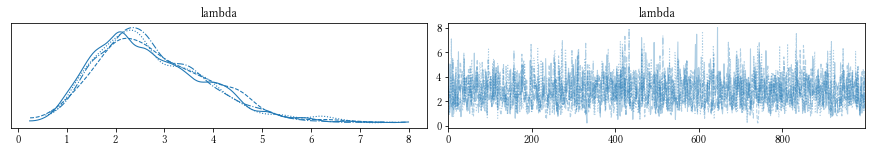

In [35]:
pm.plot_trace(trace)

リスト6.35: サンプリング結果の要約統計量



In [36]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda,2.771,1.161,0.774,4.789,0.027,0.019,1735.0,2465.0,1.0


リスト6.36: 事後期待値と事後中央値



In [37]:
mu = trace['lambda'].mean()
sigma = trace['lambda'].std()

print(f'EAP = {mu}')
print(f'MED = {sigma}')

EAP = 2.770910489800644
MED = 1.1610218384185667


リスト6.37: 事後確率最大値



In [38]:
map = pm.find_MAP(model=model)
map

{'lambda_log__': array(0.83290896), 'lambda': array(2.29999962)}

リスト6.38: MCMC法による推定値と真値の比較



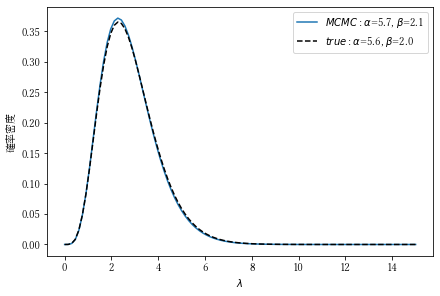

In [39]:
from scipy import stats

plt.rcParams['font.family'] = 'Yu Mincho'

alpha_mc = mu**2 / sigma**2
beta_mc = mu / sigma**2
alpha_t = 5.6
beta_t = 2.0

x = np.linspace(0, 15, num=100)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x, stats.gamma.pdf(x, alpha_mc, scale=1/beta_mc),
        label=rf'$MCMC: \alpha$={alpha_mc:.1f}, $\beta$={beta_mc:.1f}')
ax.plot(x, stats.gamma.pdf(x, alpha_t, scale=1/beta_t),
        'k--',
        label=rf'$true: \alpha$={alpha_t}, $\beta$={beta_t}')
        
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('確率密度')
ax.legend()

リスト6.39: 最高密度区間の確認



In [40]:
pm.hdi(trace)

<xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    lambda   (hdi) float64 0.7737 4.789

リスト6.40: `pm.plot_posterior` 関数の例①



<AxesSubplot:title={'center':'lambda'}>

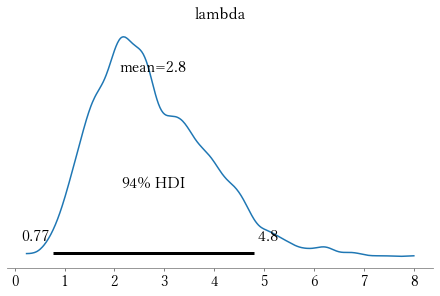

In [41]:
pm.plot_posterior(trace)

リスト6.41: `pm.plot_posterior` 関数の例②



<AxesSubplot:title={'center':'lambda'}>

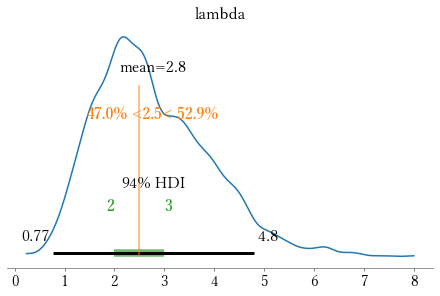

In [42]:
pm.plot_posterior(trace, rope=[2.0, 3.0], ref_val=2.5)

リスト6.42: `pm.plot_forest` 関数の例①



array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

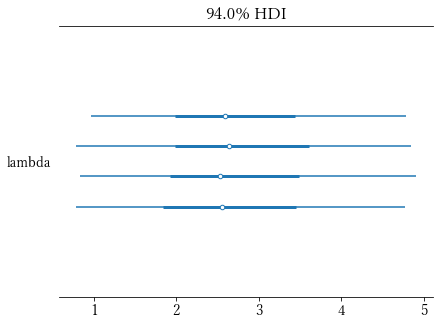

In [43]:
pm.plot_forest(trace)

リスト6.43: `pm.plot_forest` 関数の例②



array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

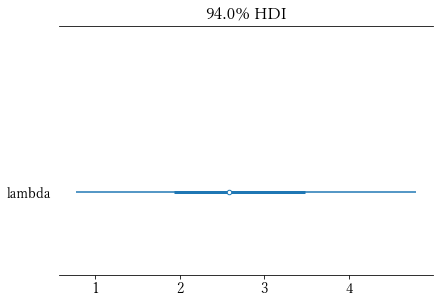

In [44]:
pm.plot_forest(trace, combined=True)